Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import sklearn.metrics
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
phi


array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
# Vaš kôd ovdje
w=np.dot(np.matmul(linalg.inv(np.matmul(np.transpose(phi),phi)),np.transpose(phi)),y)
wPinv = linalg.pinv(phi).dot(y)
print(w)
print(wPinv)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

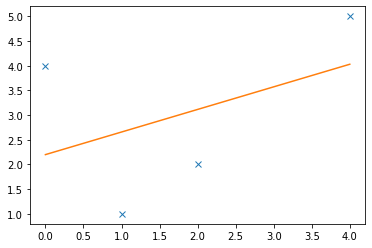

4.085714285714285
2.0428571428571427


In [7]:
# Vaš kôd ovdje
def h(t):
    return t.dot(w)

plt.plot(X,y,'x',label='primjeri')
plt.plot(X,h(phi),label='regresija')
plt.show()

print(0.5*(sum((y-h(phi))**2)))
print(sklearn.metrics.mean_squared_error(y,h(phi)))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje
try:
    w = linalg.inv(phi).dot(y)
except LinAlgError:
    print("LinAlgError")

LinAlgError


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

[2.2        0.45714286]


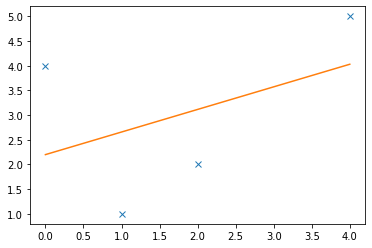

4.085714285714286
2.042857142857143


In [10]:
# Vaš kôd ovdje
reg = LinearRegression()
reg.fit(X,y)
print(np.hstack([reg.intercept_,reg.coef_]))

plt.plot(X,y,'x',label='primjeri')
plt.plot(X,reg.predict(X),label='regresija')
plt.show()
# 
print(0.5*(sum((y-reg.predict(X))**2)))
print(sklearn.metrics.mean_squared_error(y,reg.predict(X)))

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    return f(X)+normal(0,noise,X.size).reshape(X.size,1)

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

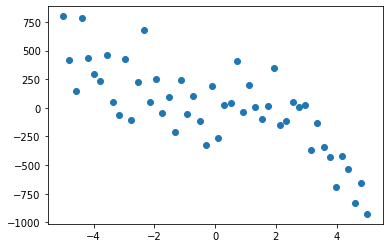

In [13]:
# Vaš kôd ovdje
def f(x):
    return 5 + x - 2*x**2 - 5*x**3

inst = make_instances(-5,5,50)
labels = make_labels(inst,f,noise=200)
plt.scatter(inst,labels)
plt.show()


### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

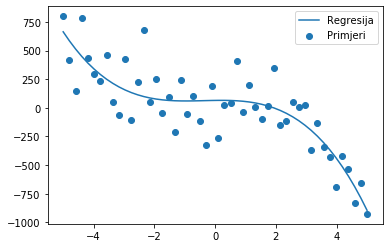

962755.1107934279


In [14]:
# Vaš kôd ovdje
poly2 = PolynomialFeatures(3)
design2 = poly2.fit_transform(inst)
reg2 = LinearRegression()
reg2.fit(design2,labels)

plt.scatter(inst,labels,label="Primjeri")
plt.plot(inst,reg2.predict(design2),label="Regresija")
plt.legend()
plt.show()

print(0.5*(sum((labels-reg2.predict(design2))**2)))


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

1450064.8266002992
962755.1107934279
947161.8711519985
885389.0353559523
631636.6435665754


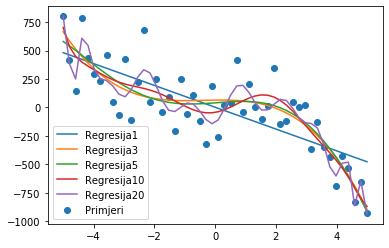

In [15]:
d = [1, 3, 5, 10, 20]
plt.scatter(inst,labels,label="Primjeri")
for i in d:
    poly3= PolynomialFeatures(i)
    design3 = poly3.fit_transform(inst)
    reg3 = LinearRegression()
    reg3.fit(design3,labels)
    plt.plot(inst,reg3.predict(design3),label="Regresija"+str(i))
    print(0.5*(sum((labels-reg3.predict(design3))**2)))
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

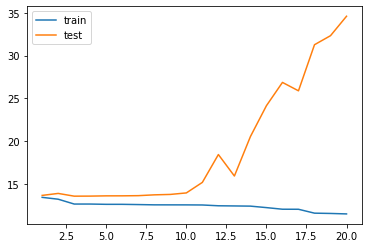

In [17]:
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(inst, labels, test_size=0.5)
d=np.arange(1,21)
train_error = []
test_error = []
for i in d:
    poly3b= PolynomialFeatures(i)
    design3b = poly3b.fit_transform(X_train)
    reg3b = LinearRegression()
    reg3b.fit(design3b,y_train)
    train_error.append(0.5*(sum((y_train-reg3b.predict(poly3b.fit_transform(X_train)))**2)))
    test_error.append(0.5*(sum((y_test-reg3b.predict(poly3b.fit_transform(X_test)))**2)))
plt.plot(d,log(train_error),label='train')
plt.plot(d,log(test_error),label='test')
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

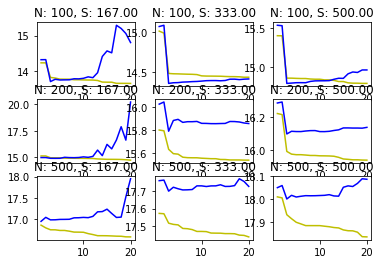

In [36]:
# Vaš kôd ovdje

noise = [100,200,500]
perc = [1/3,2/3,1]

inst3c = make_instances(-5,5,1000)

fig, axarr = plt.subplots(3,3)
nInd=-1
for n in noise:
    nInd+=1
    labels3c = make_labels(inst3c,f,noise=n)
    X_train3c, X_test3c, y_train3c, y_test3c = train_test_split(inst3c, labels3c, test_size=0.5)
    pInd=-1
    for p in perc:
        pInd+=1
        randTrain = np.random.choice(X_train3c.shape[0], int(p*X_train3c.shape[0]),replace=True)
        randTest = np.random.choice(X_test3c.shape[0], int(p*X_test3c.shape[0]),replace=True)
        X_train =X_train3c[randTrain]
        X_test =X_test3c[randTest]
        y_train =y_train3c[randTrain]
        y_test =y_test3c[randTest]

        d=np.arange(1,21)
        train_error = []
        test_error = []
        for i in d:
            poly3b= PolynomialFeatures(i)
            design3b = poly3b.fit_transform(X_train)
            reg3b = LinearRegression()
            reg3b.fit(design3b,y_train)
            train_error.append(0.5*(sum((y_train-reg3b.predict(poly3b.fit_transform(X_train)))**2)))
            test_error.append(0.5*(sum((y_test-reg3b.predict(poly3b.fit_transform(X_test)))**2)))
        axarr[nInd,pInd].plot(d,log(train_error),color='y')
        axarr[nInd,pInd].plot(d,log(test_error),color='b')
        axarr[nInd,pInd].set_title("N: "+str(n)+", S: "+ "{0:.2f}".format(round(p*X_train3c.shape[0])))

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
# Vaš kôd ovdje

lambdas = [0,1,10]

poly = PolynomialFeatures(3)
design = poly.fit_transform(X)

eye = np.eye(design.shape[1], dtype=int)
eye[0][0] = 0

for l in lambdas:
    w=np.dot(np.matmul(linalg.inv(np.matmul(np.transpose(design),design)+l*eye),np.transpose(design)),y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
# Vaš kôd ovdje

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(design,y)
    print(np.hstack([ridge.intercept_,ridge.coef_[1:]]))


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

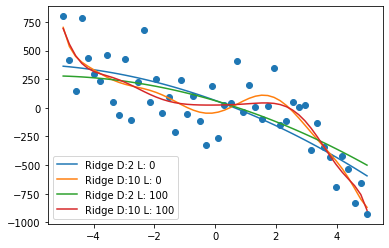

In [22]:
# Vaš kôd ovdje

plt.scatter(inst,labels)
for l in [0,100]:
    for d in [2,10]:
        poly3= PolynomialFeatures(d)
        design3 = poly3.fit_transform(inst)
        reg3 = Ridge(alpha=l)
        reg3.fit(design3,labels)
        plt.plot(inst,reg3.predict(design3),label="Ridge D:"+str(d)+" L: "+str(l))
        
plt.legend()
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


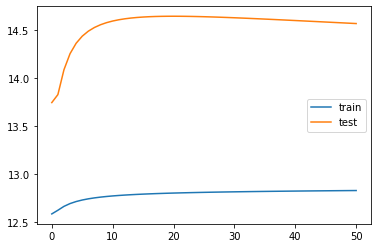

In [23]:
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(inst, labels, test_size=0.5)
poly5b= PolynomialFeatures(10)
design5b = poly5b.fit_transform(X_train)
train_error = []
test_error = []
for i in range(0,51):
    rid5b = Ridge(alpha=i)
    rid5b.fit(design5b,y_train)
    train_error.append(0.5*(sum((y_train-rid5b.predict(poly5b.fit_transform(X_train)))**2)))
    test_error.append(0.5*(sum((y_test-rid5b.predict(poly5b.fit_transform(X_test)))**2)))
plt.plot(range(0,51),log(train_error),label='train')
plt.plot(range(0,51),log(test_error),label='test')
plt.legend()
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

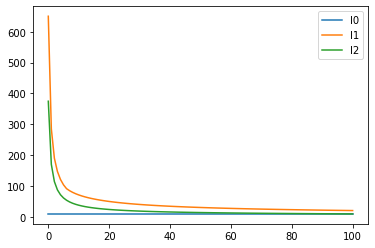

In [25]:
# Vaš kôd ovdje
def l1_norm(coef):
    temp = 0
    for c in coef:
        temp += abs(c)
    return temp

def l2_norm(coef):
    temp = 0
    for c in coef:
        temp += c**2
    return sqrt(temp)

X_train, X_test, y_train, y_test = train_test_split(inst, labels, test_size=0.5)
poly5b= PolynomialFeatures(10)
design5b = poly5b.fit_transform(X_train)
l0 = []
l1 = []
l2 = []
for i in range(0,101):
    rid5b = Ridge(alpha=i)
    rid5b.fit(design5b,y_train)
    l0.append(nonzeroes(rid5b.coef_[0]))
    l1.append(l1_norm(rid5b.coef_[0]))
    l2.append(l2_norm(rid5b.coef_[0]))

plt.plot(range(0,101),l0,label='l0')
plt.plot(range(0,101),l1,label='l1')
plt.plot(range(0,101),l2,label='l2')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 371565.71775640885, tolerance: 182.7643074459522
  positive)
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393738.1560172261, tolerance: 182.7643074459522
  positive)
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393873.34701303596, tolerance: 182.7643074459522
  positive)
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394005.04609910597, tolerance: 182.7643074459522
  positive)
C:\Users\eztorjo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: Converge

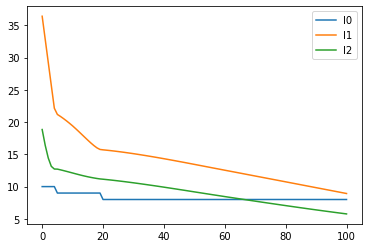

In [26]:
# Vaš kôd ovdje
from sklearn.linear_model import Lasso

l0 = []
l1 = []
l2 = []
for i in range(0,101):
    rid5b = Lasso(alpha=i)
    rid5b.fit(design5b,y_train)
    l0.append(nonzeroes(rid5b.coef_))
    l1.append(l1_norm(rid5b.coef_))
    l2.append(l2_norm(rid5b.coef_))

plt.plot(range(0,101),l0,label='l0')
plt.plot(range(0,101),l1,label='l1')
plt.plot(range(0,101),l2,label='l2')
plt.legend()
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

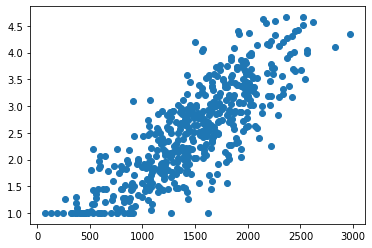

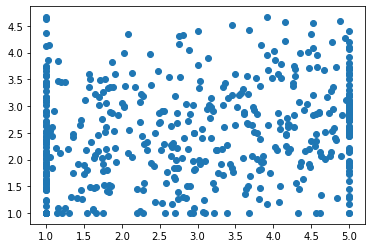

In [28]:
# Vaš kôd ovdje

plt.scatter(grades_X[:,0],grades_y)
plt.show()
plt.scatter(grades_X[:,1],grades_y)
plt.show()


**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]


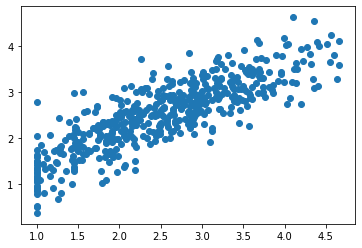

In [29]:
# Vaš kôd ovdje

rid = Ridge(alpha=0.01)
rid.fit(grades_X,grades_y)
print(rid.coef_)
plt.scatter(grades_y,rid.predict(grades_X))

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

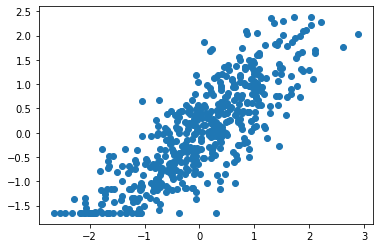

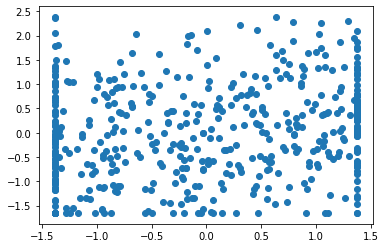

[[0.81630375 0.15167761]]


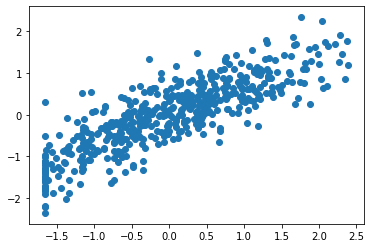

In [31]:
# Vaš kôd ovdje
scaler = StandardScaler()
scaler.fit(grades_X)
grades_X_fixed = scaler.fit_transform(grades_X)

grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

plt.scatter(grades_X_fixed[:,0],grades_y_fixed)
plt.show()
plt.scatter(grades_X_fixed[:,1],grades_y_fixed)
plt.show()

rid = Ridge(alpha=0.01)
rid.fit(grades_X_fixed,grades_y_fixed)
print(rid.coef_)
plt.scatter(grades_y_fixed,rid.predict(grades_X_fixed))


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
# Vaš kôd ovdje

secondColumn = grades_X_fixed[:,1].T.reshape(500,1)
grades_X_fixed_colinear = np.c_[grades_X_fixed,secondColumn]

grades_X_fixed_colinear

array([[ 0.95063817, -0.78607869, -0.78607869],
       [-0.50343434, -0.50193004, -0.50193004],
       [ 1.18596832, -0.52213172, -0.52213172],
       ...,
       [-0.31593552,  0.80074234,  0.80074234],
       [ 0.81288393,  1.24783236,  1.24783236],
       [-0.01938126,  1.21729714,  1.21729714]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

[[0.81630364 0.07583957 0.07583957]]


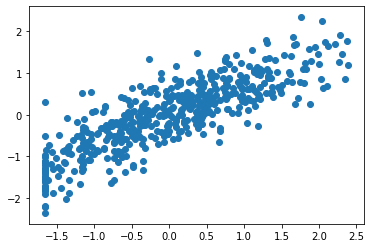

In [33]:
# Vaš kôd ovdje
rid = Ridge(alpha=0.01)
rid.fit(grades_X_fixed_colinear,grades_y_fixed)
print(rid.coef_)
plt.scatter(grades_y_fixed,rid.predict(grades_X_fixed_colinear))

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
# Vaš kôd ovdje

rid1Coef = np.empty([0,3])
rid2Coef = np.empty([0,3])
for i in range(0,10):
    rand = np.random.choice(grades_X_fixed_colinear.shape[0], int(0.5*grades_X_fixed_colinear.shape[0]), replace=True)
    grades_50 = grades_X_fixed_colinear[rand]
    y_50 = grades_y_fixed[rand]
    rid1 = Ridge(alpha=0.01)
    rid1.fit(grades_50,y_50)
    rid1Coef = np.vstack([rid1Coef,rid1.coef_.reshape(1,3)])
    rid2 = Ridge(alpha=1000)
    rid2.fit(grades_50,y_50)
    rid2Coef = np.vstack([rid2Coef,rid2.coef_.reshape(1,3)])

print(rid1Coef)
print(rid2Coef)
print(np.std(rid1Coef,axis=0))
print(np.std(rid2Coef,axis=0))

[[0.78442614 0.05798842 0.05798842]
 [0.84185496 0.10853086 0.10853086]
 [0.80028869 0.09258294 0.09258294]
 [0.84406406 0.0516362  0.0516362 ]
 [0.78971539 0.07886073 0.07886073]
 [0.80237957 0.06556442 0.06556442]
 [0.84263554 0.06199831 0.06199831]
 [0.84846728 0.07953089 0.07953089]
 [0.807097   0.08006777 0.08006777]
 [0.90488057 0.06472009 0.06472009]]
[[0.17042548 0.05277113 0.05277113]
 [0.16606135 0.03682682 0.03682682]
 [0.16016355 0.02992725 0.02992725]
 [0.17531914 0.02508137 0.02508137]
 [0.16155553 0.03428091 0.03428091]
 [0.16091022 0.02379852 0.02379852]
 [0.16897212 0.02447929 0.02447929]
 [0.15569452 0.04243913 0.04243913]
 [0.17085732 0.03982161 0.03982161]
 [0.15395101 0.01845126 0.01845126]]
[0.03492744 0.01639009 0.01639009]
[0.00666392 0.00991688 0.00991688]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
# Vaš kôd ovdje
design = grades_X_fixed_colinear
eye = np.eye(design.shape[1], dtype=int)
w001 = np.matmul(np.transpose(design),design)+0.01*eye
w10 = np.matmul(np.transpose(design),design)+10*eye
print(np.linalg.cond(w001))
print(np.linalg.cond(w10))

100542.86653456726
101.541866534993


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  